# EDA

In [17]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open("cleaned/cleaned_10_28_2023.csv","r") as f:
    df = pd.read_csv(f, converters={'routes': ast.literal_eval})

In [18]:
df.head()

,station_complex_id,borough,routes,payment_method,latitude,longitude,ridership,transfers,region,ridership_percap,transfers_percap
0,A002,Manhattan,"[5, N, R, 4, W, 6]",metrocard,40.762661,-73.967255,11868,995,NW,0.007435,0.000623
1,A002,Manhattan,"[5, N, R, 4, W, 6]",omny,40.762661,-73.967255,15570,2348,NW,0.009754,0.001471
2,A006,Manhattan,"[N, R, W]",metrocard,40.764812,-73.973351,5546,71,NW,0.003474,0.000044
3,A006,Manhattan,"[N, R, W]",omny,40.764812,-73.973351,7802,238,NW,0.004888,0.000149
4,A010,Manhattan,"[N, R, Q, W]",metrocard,40.764664,-73.980659,9293,153,NW,0.005822,0.000096


## Geo plots

In [ ]:
geo_df = df[["latitude","longitude","ridership"]].groupby(["latitude","longitude"]).sum().reset_index()

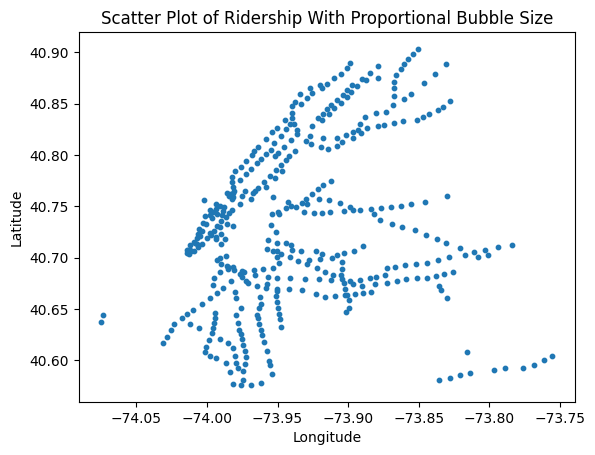

In [41]:
plt.scatter(geo_df["longitude"], geo_df["latitude"], s = 10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Subway Stations')
plt.show()

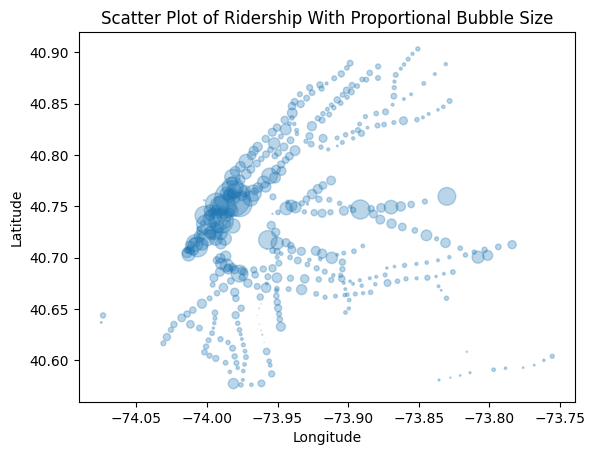

In [36]:
plt.scatter(geo_df["longitude"], geo_df["latitude"], s=geo_df["ridership"]/200, alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Subway Stations With Proportional Ridership Bubbles')
plt.show()

## Bar Plot

In [23]:
def hist_plot(cat, val):
    plt_df = df[[cat,val]].groupby(cat).sum().reset_index()
    plt.bar(plt_df[cat], plt_df[val], color='green', alpha=0.7)
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.title(f'Bar Graph of {val} by {cat}')
    plt.show()

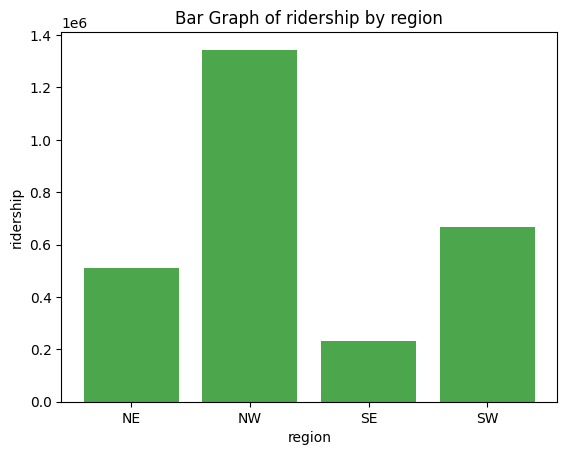

In [28]:
hist_plot("region", "ridership")

## Box Plots

In [58]:
def box_plot(cat, val):
    plt_df = df[[cat,val]]
    # print([plt_df[plt_df[cat]==c][val] for c in plt_df[cat].unique()])
    plt.boxplot([plt_df[plt_df[cat]==c][val] for c in plt_df[cat].unique()],
                labels=[c for c in plt_df[cat].unique()])
    plt.show()


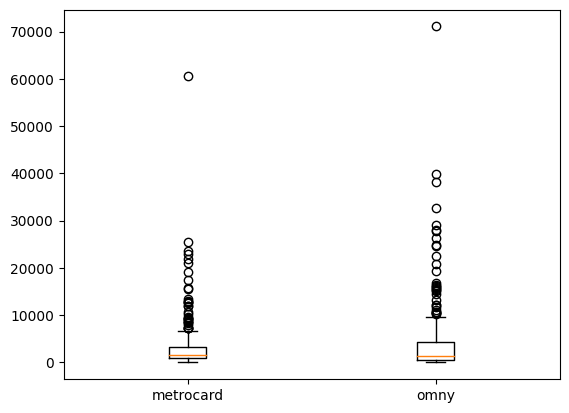

In [59]:
box_plot("payment_method","ridership")

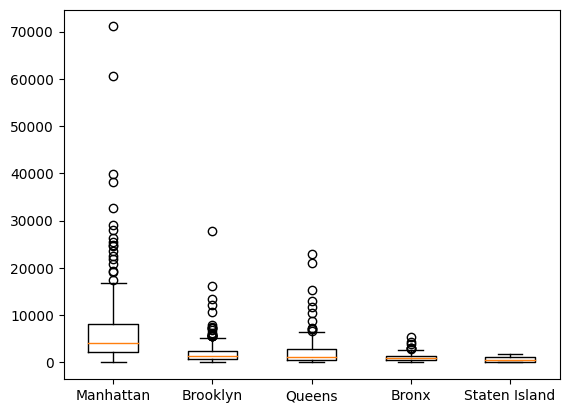

In [60]:
box_plot("borough","ridership")

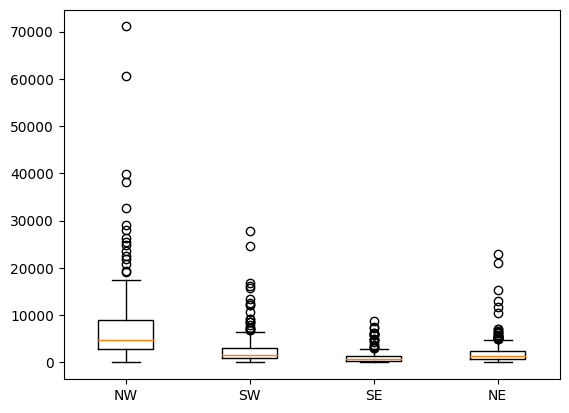

In [61]:
box_plot("region","ridership")

# Number of Routes Through Station

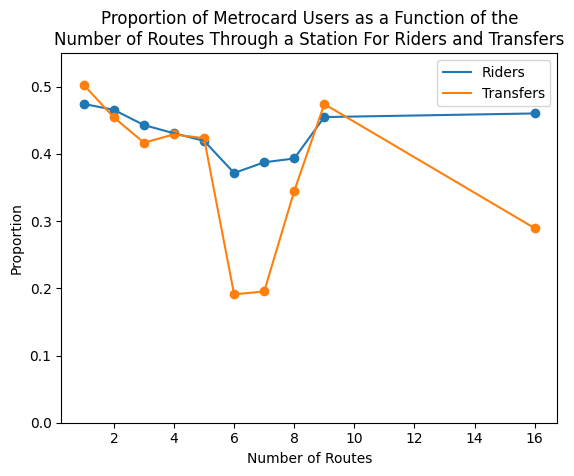

In [91]:
df["route_num"] = [len(e) for e in df["routes"]]

route_df = df[["route_num","payment_method","ridership","transfers"]]
route_df = route_df.groupby(["route_num","payment_method"]).sum().reset_index()

new_data = {
    "Number of Routes":[],
    "Rider Proportion":[],
    "Transfer Proportion":[]
}

for val in route_df["route_num"].unique():
    temp = route_df[route_df["route_num"] == val].copy()

    temp["ridership"] = temp["ridership"]/ (temp["ridership"].sum())
    temp["transfers"] = temp["transfers"]/ (temp["transfers"].sum())

    new_data["Number of Routes"].append(val)
    new_data["Rider Proportion"].append(temp[temp["payment_method"] == "metrocard"]["ridership"].iloc[0])
    new_data["Transfer Proportion"].append(temp[temp["payment_method"] == "metrocard"]["transfers"].iloc[0])

new_data = pd.DataFrame(new_data)

plt.plot(new_data["Number of Routes"], new_data["Rider Proportion"],label = "Riders")
plt.plot(new_data["Number of Routes"], new_data["Transfer Proportion"],label="Transfers")
plt.legend()

plt.scatter(new_data["Number of Routes"], new_data["Rider Proportion"])
plt.scatter(new_data["Number of Routes"], new_data["Transfer Proportion"])

plt.xlabel("Number of Routes")
plt.ylabel("Proportion")
plt.title("Proportion of Metrocard Users as a Function of the\nNumber of Routes Through a Station For Riders and Transfers")

plt.ylim(0,0.55)

plt.show()
